<a href="https://colab.research.google.com/github/Rajiv710/Major-project/blob/main/COVID_19_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import requests
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data= 'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'
df = pd.read_csv(data)
df

Date      Country  Confirmed  Recovered  Deaths
0      2020-01-22  Afghanistan          0          0       0
1      2020-01-23  Afghanistan          0          0       0
2      2020-01-24  Afghanistan          0          0       0
3      2020-01-25  Afghanistan          0          0       0
4      2020-01-26  Afghanistan          0          0       0
...           ...          ...        ...        ...     ...
58441  2020-11-18     Zimbabwe       8981       8184     261
58442  2020-11-19     Zimbabwe       9046       8195     265
58443  2020-11-20     Zimbabwe       9120       8229     265
58444  2020-11-21     Zimbabwe       9172       8235     265
58445  2020-11-22     Zimbabwe       9220       8250     268

[58446 rows x 5 columns]

In [6]:
df['Active cases'] = df['Confirmed'] - (df['Recovered'] + df['Deaths'])
df

Date      Country  Confirmed  Recovered  Deaths  Active cases
0      2020-01-22  Afghanistan          0          0       0             0
1      2020-01-23  Afghanistan          0          0       0             0
2      2020-01-24  Afghanistan          0          0       0             0
3      2020-01-25  Afghanistan          0          0       0             0
4      2020-01-26  Afghanistan          0          0       0             0
...           ...          ...        ...        ...     ...           ...
58441  2020-11-18     Zimbabwe       8981       8184     261           536
58442  2020-11-19     Zimbabwe       9046       8195     265           586
58443  2020-11-20     Zimbabwe       9120       8229     265           626
58444  2020-11-21     Zimbabwe       9172       8235     265           672
58445  2020-11-22     Zimbabwe       9220       8250     268           702

[58446 rows x 6 columns]

In [7]:
df['Daily cases'] = df.groupby(['Country'])['Confirmed'].diff().fillna(df['Confirmed'])
df

Date      Country  Confirmed  ...  Deaths  Active cases  Daily cases
0      2020-01-22  Afghanistan          0  ...       0             0          0.0
1      2020-01-23  Afghanistan          0  ...       0             0          0.0
2      2020-01-24  Afghanistan          0  ...       0             0          0.0
3      2020-01-25  Afghanistan          0  ...       0             0          0.0
4      2020-01-26  Afghanistan          0  ...       0             0          0.0
...           ...          ...        ...  ...     ...           ...          ...
58441  2020-11-18     Zimbabwe       8981  ...     261           536         36.0
58442  2020-11-19     Zimbabwe       9046  ...     265           586         65.0
58443  2020-11-20     Zimbabwe       9120  ...     265           626         74.0
58444  2020-11-21     Zimbabwe       9172  ...     265           672         52.0
58445  2020-11-22     Zimbabwe       9220  ...     268           702         48.0

[58446 rows x 7 columns]

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58446 entries, 0 to 58445
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          58446 non-null  datetime64[ns]
 1   Country       58446 non-null  object        
 2   Confirmed     58446 non-null  int64         
 3   Recovered     58446 non-null  int64         
 4   Deaths        58446 non-null  int64         
 5   Active cases  58446 non-null  int64         
 6   Daily cases   58446 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 3.1+ MB


In [9]:
a = df.groupby(['Country'])['Confirmed'].max().sort_values(ascending = False).head()
a

Country
US        12246849
India      9139865
Brazil     6071401
France     2191180
Russia     2071858
Name: Confirmed, dtype: int64

In [10]:
highest = None
for i in a.index:
  if highest is None:
    highest =  df[ df['Country']== i ]
  else:
    x = df[ df['Country']== i ]
    highest= highest.merge(x,how='outer')
highest

Date Country  Confirmed  ...  Deaths  Active cases  Daily cases
0    2020-01-22      US          1  ...       0             1          1.0
1    2020-01-23      US          1  ...       0             1          0.0
2    2020-01-24      US          2  ...       0             2          1.0
3    2020-01-25      US          2  ...       0             2          0.0
4    2020-01-26      US          5  ...       0             5          3.0
...         ...     ...        ...  ...     ...           ...          ...
1525 2020-11-18  Russia    1975629  ...   34068        451668      20717.0
1526 2020-11-19  Russia    1998966  ...   34525        449496      23337.0
1527 2020-11-20  Russia    2023025  ...   34980        448693      24059.0
1528 2020-11-21  Russia    2047563  ...   35442        447224      24538.0
1529 2020-11-22  Russia    2071858  ...   35838        453252      24295.0

[1530 rows x 7 columns]

In [11]:
b = highest.groupby(['Country'])['Deaths'].max()
c = highest.groupby(['Country'])['Recovered'].max()
maxi = pd.DataFrame({'Total cases': a, 'Total Recovered':c,'Total deaths': b })
maxi.sort_values(by = ['Total cases'],inplace = True, ascending = False)
maxi

Total cases  Total Recovered  Total deaths
US         12246849          4529700        256782
India       9139865          8562641        133738
Brazil      6071401          5457973        169183
France      2191180           157259         48807
Russia      2071858          1582768         35838

Text(0.5, 0, 'Countries')

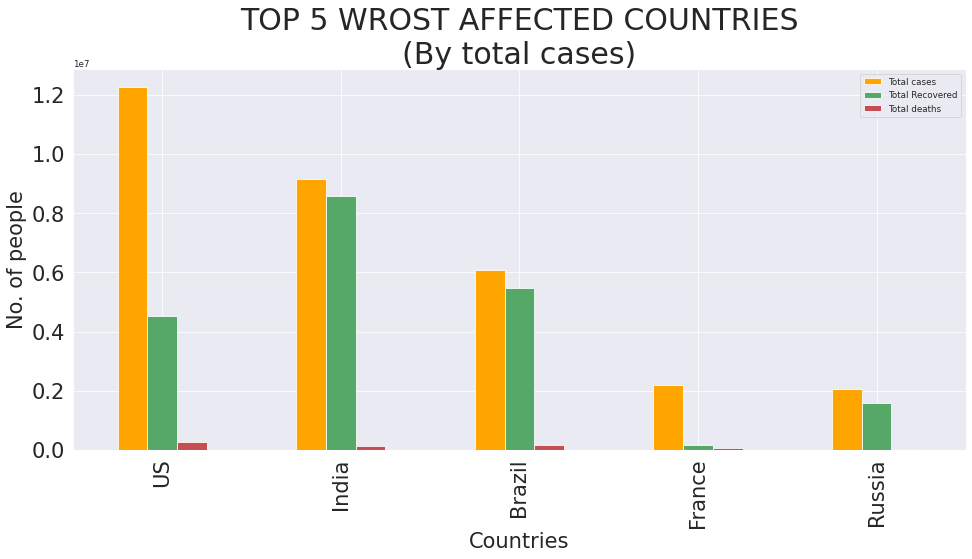

In [30]:
maxi.plot.bar(figsize = (16,7), fontsize = 21, color = {'Total cases':'#FFA500','Total Recovered':'g','Total deaths':'r'} )
plt.title( 'TOP 5 WROST AFFECTED COUNTRIES\n(By total cases)',fontsize = 30)
plt.ylabel('No. of people',fontsize = 21)
plt.xlabel('Countries',fontsize = 21)

In [13]:
active = df.groupby(['Country'])['Active cases'].max().sort_values(ascending = False).head(6)
active

Country
US                7463554
France            1985114
United Kingdom    1457360
Spain             1363735
India             1017754
Italy              805947
Name: Active cases, dtype: int64

Text(0.5, 0, 'Countries')

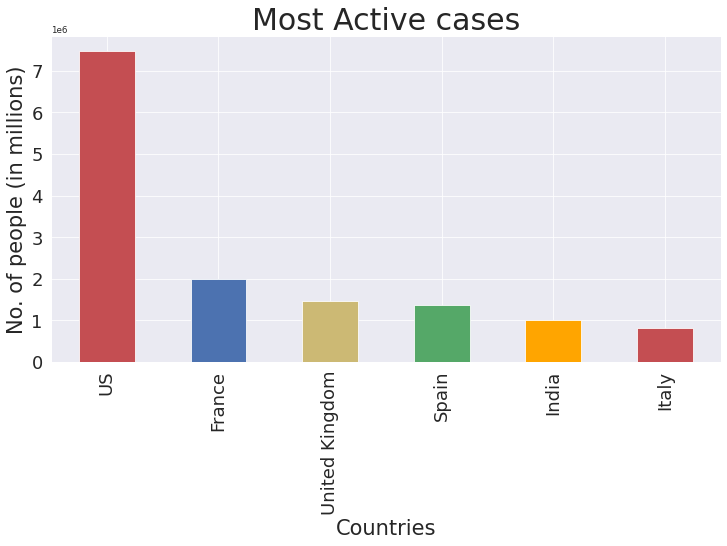

In [39]:
active.plot(figsize =(12,6), kind = 'bar',fontsize = 18,color = {'r','b','y','#FFA500','g'})
plt.title( 'Most Active cases',fontsize = 30)
plt.ylabel('No. of people (in millions)',fontsize = 21)
plt.xlabel('Countries',fontsize = 21)


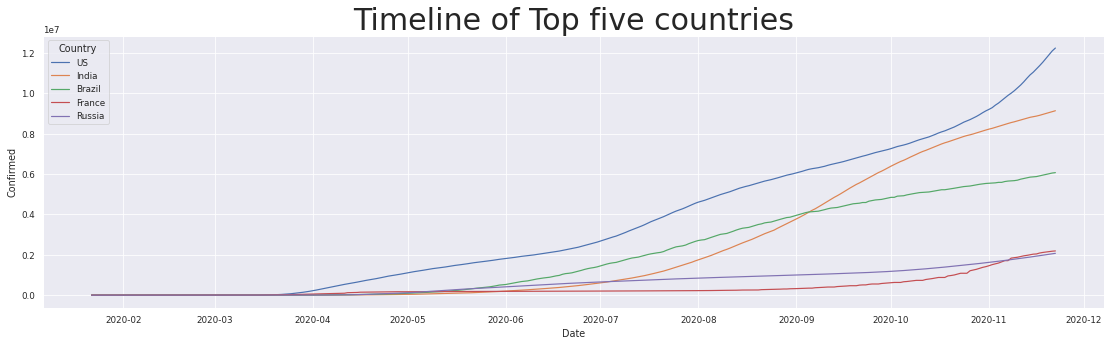

In [41]:
plt.subplots(figsize=(19,5))
sns.lineplot(x = 'Date', y = 'Confirmed', hue = 'Country',data = highest)
sns.set_context('talk')
plt.title('Timeline of Top five countries', fontsize = 30)
sns.set(rc={'figure.figsize':(30,6)})

plt.show()

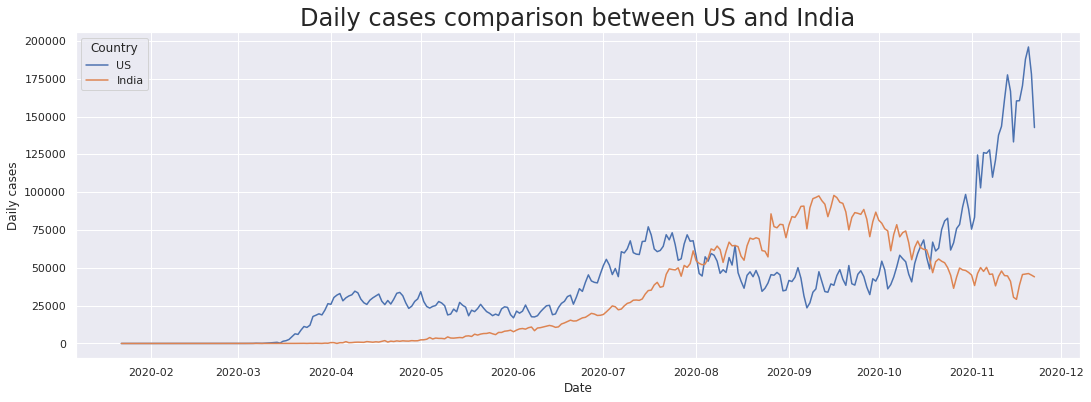

In [16]:
fig_dims = (18,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x = 'Date', y = 'Daily cases', hue = 'Country',data = highest[(highest.Country == 'US') | (highest.Country == 'India')],ax=ax)
sns.set_context('talk')
plt.title('Daily cases comparison between US and India', fontsize = 24)

plt.show()

In [17]:
idx = df.groupby(['Country'])['Daily cases'].transform(max) == df['Daily cases']
Max_daily_cases = df[idx]
M = Max_daily_cases.sort_values(by = ['Daily cases'],ascending =False).head(8)

Text(0.5, 0, 'Date')

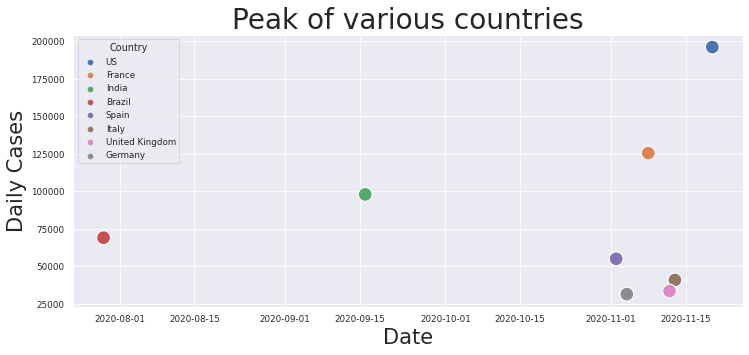

In [40]:
sns.scatterplot(x = 'Date', y = 'Daily cases', hue = 'Country', data = M, s = 190)
sns.set(rc={'figure.figsize':(12,5)})
sns.set_context('paper')
plt.title('Peak of various countries',fontsize = 28)
plt.ylabel('Daily Cases',fontsize = 21)
plt.xlabel('Date',fontsize = 21)

In [19]:
idx = df.groupby(['Country'])['Confirmed'].transform(max) == df['Confirmed']
Latest =df[idx]
Latest= Latest.drop_duplicates(subset = 'Confirmed', keep ='last')
Latest

Date             Country  ...  Active cases  Daily cases
305   2020-11-22         Afghanistan  ...          7085        203.0
611   2020-11-22             Albania  ...         16220        565.0
917   2020-11-22             Algeria  ...         23796       1088.0
1223  2020-11-22             Andorra  ...           822         49.0
1529  2020-11-22              Angola  ...          6810         80.0
...          ...                 ...  ...           ...          ...
57221 2020-11-22  West Bank and Gaza  ...         11987       1390.0
57527 2020-11-22      Western Sahara  ...             1          0.0
57833 2020-11-22               Yemen  ...            43          6.0
58139 2020-11-22              Zambia  ...           366         30.0
58445 2020-11-22            Zimbabwe  ...           702         48.0

[191 rows x 7 columns]

In [24]:
Latest = Latest[Latest['Confirmed'] > 1000]

In [25]:
Latest['Recovery_rate'] = Latest['Recovered']/Latest['Confirmed']*100
high_recover = Latest.sort_values(by = 'Recovery_rate',ascending = False).head(4)
high_recover

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Date        Country  ...  Daily cases  Recovery_rate
47123  2020-11-22      Singapore  ...         12.0      99.840096
13157  2020-11-22  Cote d'Ivoire  ...         12.0      98.391522
19583  2020-11-22          Gabon  ...          0.0      98.302486
15299  2020-11-22       Djibouti  ...          7.0      98.006351

[4 rows x 8 columns]

Text(0.5, 0.98, '\n\n(Minimum 1000 cases)')

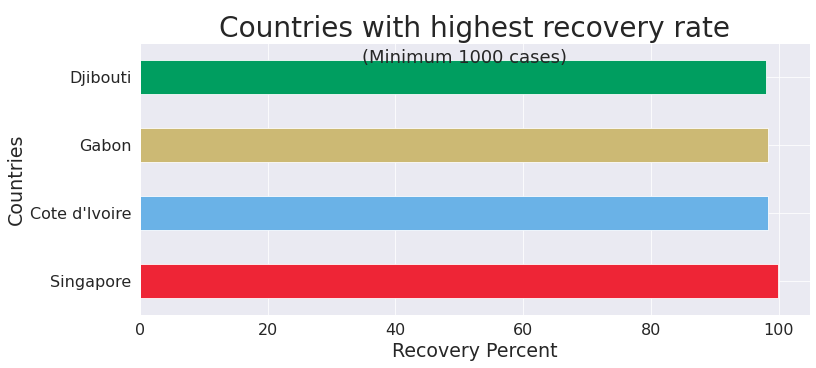

In [26]:
high_recover.plot.barh(y = 'Recovery_rate', x = 'Country', color = {'#ee2536','#009E60','y','#6ab2e7'},legend = None,fontsize = 16)
plt.ylabel('Countries',fontsize = 19)
plt.xlabel('Recovery Percent',fontsize = 19)
plt.title('Countries with highest recovery rate',fontsize = 28)
plt.suptitle('\n\n(Minimum 1000 cases)',fontsize = 18)

In [27]:
pip install bar_chart_race

In [49]:
import bar_chart_race as bcr

country = ['India','US','Italy','China','Brazil','United Kingdom','France']
df2 = pd.DataFrame(index =  df['Date'].unique())
for i in country:
  df2[i] = df.loc[df['Country']==i]['Confirmed'].values
df2


India        US    Italy  China   Brazil  United Kingdom   France
2020-01-22        0         1        0    548        0               0        0
2020-01-23        0         1        0    643        0               0        0
2020-01-24        0         2        0    920        0               0        2
2020-01-25        0         2        0   1406        0               0        3
2020-01-26        0         5        0   2075        0               0        3
...             ...       ...      ...    ...      ...             ...      ...
2020-11-18  8958483  11542094  1272352  91906  5945849         1434004  2115717
2020-11-19  9004365  11730049  1308528  91935  5981767         1456940  2137096
2020-11-20  9050597  11926053  1345767  91977  6020164         1477214  2160343
2020-11-21  9095806  12104117  1380531  92037  6052786         1497135  2178023
2020-11-22  9139865  12246849  1408868  92116  6071401         1515802  2191180

[306 rows x 7 columns]

In [50]:
bcr.bar_chart_race(df = df2, filename = None, figsize = (5,3), title = 'COVID 19 Cases by countries')

# Forecasting


Enter Country name: India


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1.0, 'India COVID 19 Daily cases Forecasting')

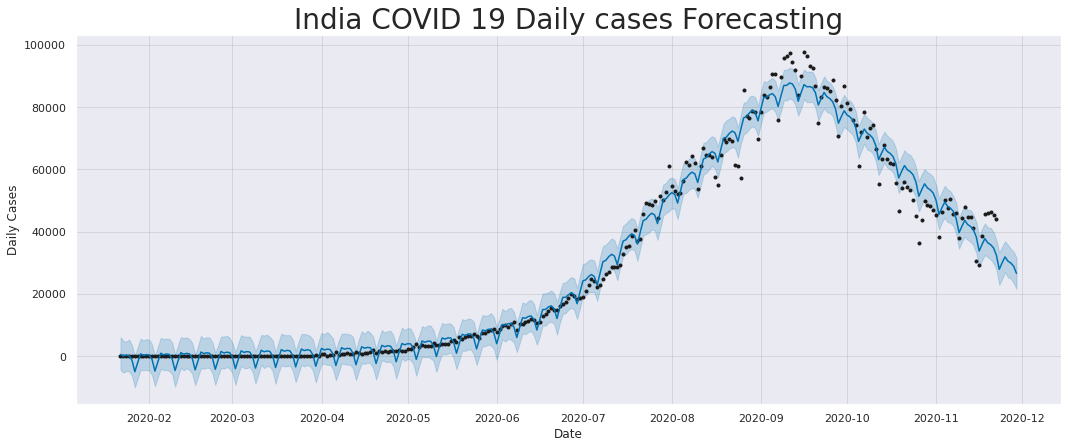

In [98]:
c = input('Enter Country name: ')
df3 = pd.DataFrame({'ds': df['Date'].unique()})
df3['y'] = df.loc[df['Country']==c]['Daily cases'].values
df3
import fbprophet
op = fbprophet.Prophet()

op.fit(df3)
forecast = op.make_future_dataframe(periods=7,freq='D')
forecast = op.predict(forecast)

op.plot( forecast,xlabel = 'Date',ylabel = 'Daily Cases',figsize=(15,6))
plt.title(c+' COVID 19 Daily cases Forecasting',fontsize = 28)

In [99]:
forecast = forecast[['ds','yhat']]
forecast.columns = ['Date','Daily cases Predicted']
forecast.reset_index
print('Prediction for next week for ',c)
forecast.tail(7)

Prediction for next week for  India


Date  Daily cases Predicted
306 2020-11-23           27920.240670
307 2020-11-24           30014.976031
308 2020-11-25           31915.648056
309 2020-11-26           30565.541113
310 2020-11-27           29952.548700
311 2020-11-28           28943.354774
312 2020-11-29           26602.362096